In [1]:
import pandas as pd
import numpy as np
from arima import ARIMAModel, ARIMATools
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("bitcoin_price_series.csv")

df = df[['Price', 'Close']]
df.drop([0, 1], inplace=True)


In [3]:

df = df.reset_index(drop=True)
df = df.rename(columns={'Price': 'date'})
df['date'] = pd.to_datetime(df['date'])  # Converte a coluna 'date' para datetime
df['Close'] = pd.to_numeric(df['Close'])  # Remove vírgulas e converte para float
df.set_index('date', inplace=True)
df.columns = ['target']
df

,target
date,
2020-01-01,7200.174316
2020-01-02,6985.470215
2020-01-03,7344.884277
2020-01-04,7410.656738
2020-01-05,7411.317383
...,...
2024-12-08,101236.015625
2024-12-09,97432.718750
2024-12-10,96675.429688


In [4]:
series = df['target']

In [5]:
series.values

array([  7200.17431641,   6985.47021484,   7344.88427734, ...,
        96675.4296875 , 101173.03125   , 101931.6328125 ])

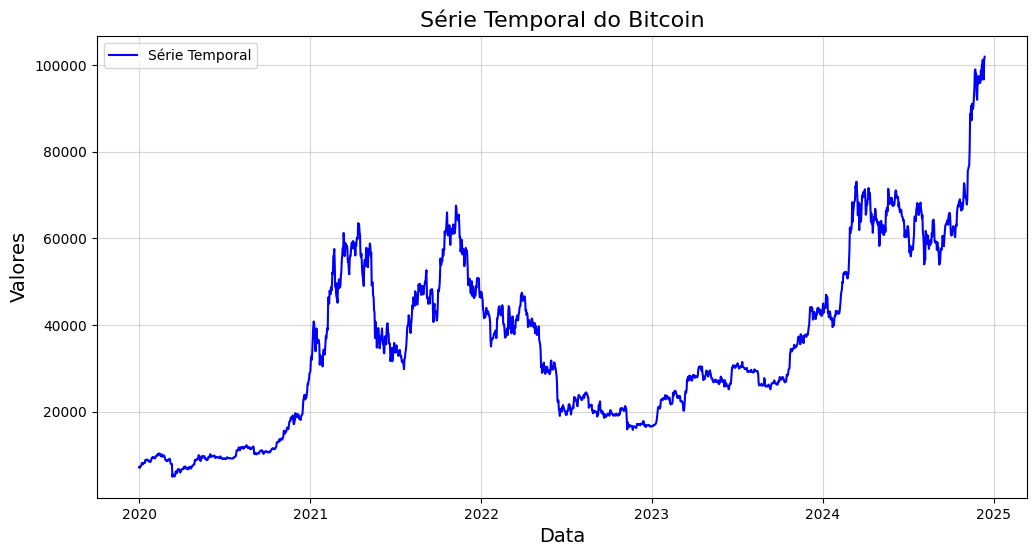

In [6]:
# Plota a série temporal
ARIMATools.plot_series(series, title='Série Temporal do Bitcoin')


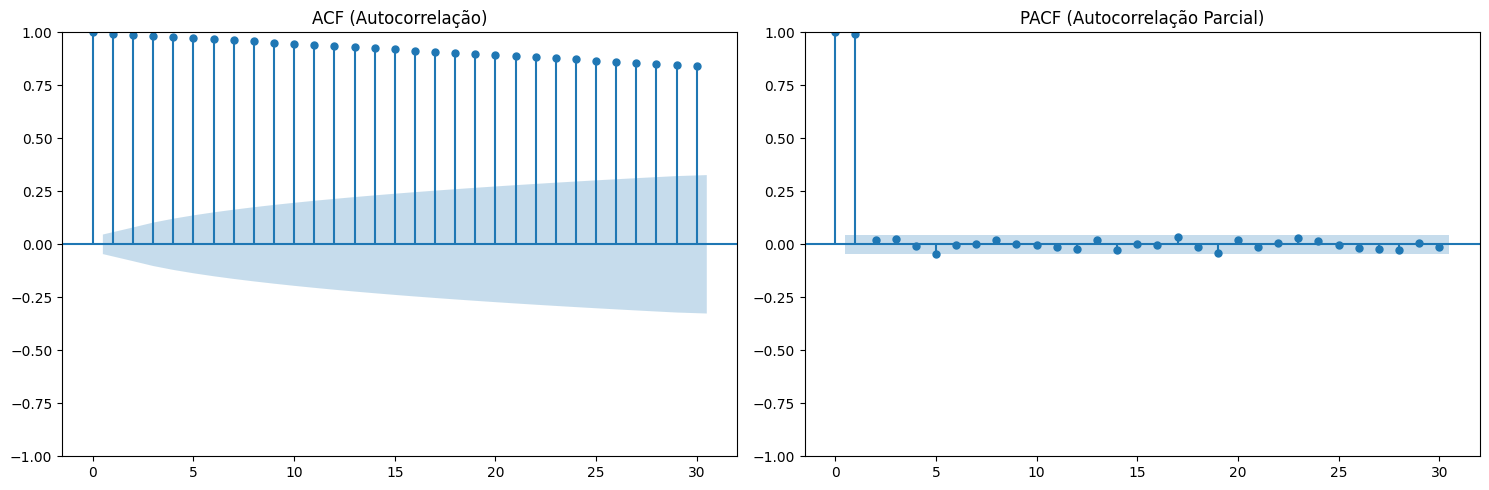

In [7]:
# Plota ACF e PACF
ARIMATools.plot_acf_pacf(series, lags=30)

In [8]:

# Instanciando o modelo
model = ARIMAModel()

In [9]:
ARIMATools.estimate_ar_ma(series, 0, 1)
ARIMATools.find_d(series, 3)

Grau de diferenciação ideal (d): 1


In [10]:
model.fit(series, p=0, d=1, q=1)

In [11]:
print("Parâmetros iniciais:")
print("AR (phi):", model.params_ar)
print("MA (theta):", model.params_ma)

Parâmetros iniciais:
AR (phi): []
MA (theta): [-0.039899394413838024]


Previsões: [101931.04618374063, 101932.27932632905, 101933.03362495244, 101932.30264140671, 101931.64301217039, 101930.56533221835, 101930.67083918312, 101930.81749452036, 101929.73040395553, 101930.17178758381, 101930.25230664678, 101930.98488135693]


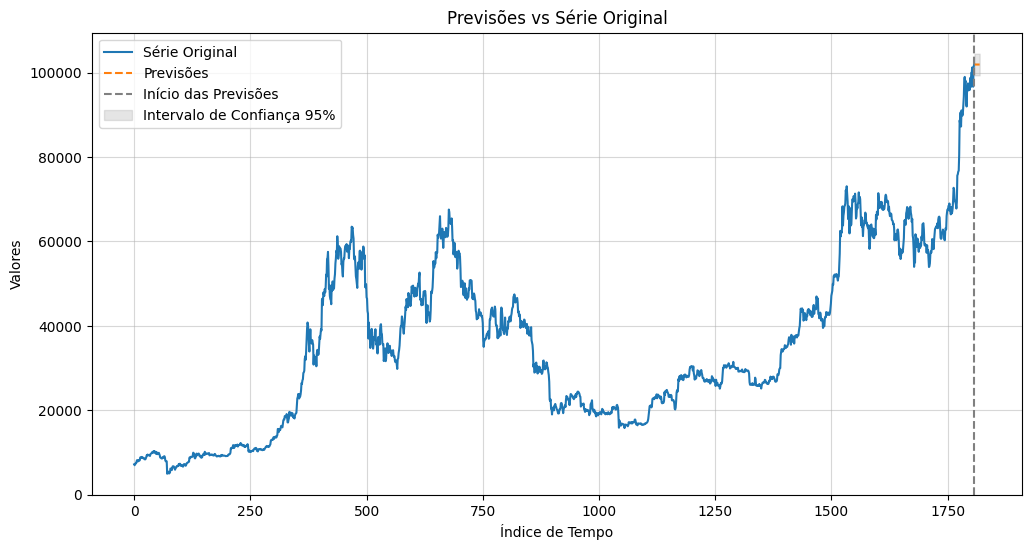

In [12]:

# Realiza previsões
forecast = model.predict(steps=12)
print("Previsões:", forecast)

# Plota a série temporal e as previsões
lower_bound, upper_bound = ARIMATools.calculate_confidence_intervals(forecast, model.residuals)
ARIMATools.plot_forecast(pd.Series(series), forecast, steps=12, lower_bound=lower_bound, upper_bound=upper_bound)

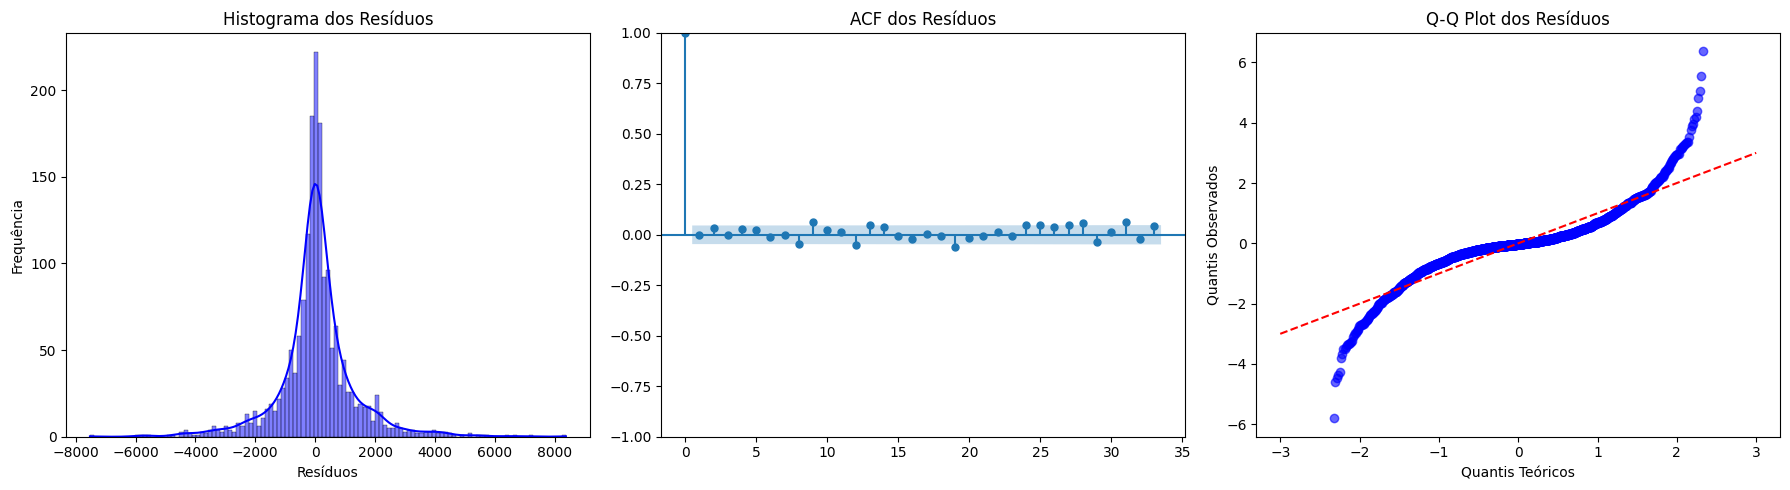

{'mean': 54.7358615333837,
 'std_dev': 1306.0073128567756,
 'min': -7524.142454772938,
 'max': 8375.151472132751,
 'skewness': 0.21590842275212183,
 'kurtosis': 5.575547196388831}

In [13]:
ARIMATools.analyze_residuals(model.residuals)